<a href="https://colab.research.google.com/github/Superslothh/tugas-wgtik-ganjil2023/blob/main/Assessment_CLO_3_template_ENG_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Assessment CLO-3: Programming Assignment - Learning</center>

READ DATASET

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<b>Topic</b>
[Classification] on [Raisins Dataset] using [Decision Tree & Naive Bayes]

<b>Group: </b>

Member:
1. Agam Marichal D.A - 1301224330
2. Ruly Bija - 1301224196
3. Muhammad Akmal Mutohar - 1301224209

#### Introduction
In this report, we have choosen the Raisins dataset and the problem that we want to solve is that we want to classified the raisins varieties using machine learning models.

We first preprocess the data that we get from UC Irvine Machine Learning Repository which is the Raisins Dataset into this Google Collab. This dataset contains Class columns which are the raisins varieties columns that we changed into numeric data by assigning unique integer to each of the varieties which then turn the data suitable for machine learning algorithms that require numeric input.

The training and testing stages are done simultaneously for each of the classification models and trained and evaluated on the testing set which results in performance metrics such as the accuracy, classification reports and the confusion matrices that are generated for each model.

In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#load your dataset
df = pd.read_excel("/content/Raisin_Dataset.xlsx")

df.head(900)



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
print(df.isnull().sum())

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


change class type

In [ ]:
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


kecimen change to "1"

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


besni change to "0"

In [ ]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,0


separate the feature and talget

In [ ]:
Y = df["Class"]

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 900 entries, 0 to 899
Series name: Class
Non-Null Count  Dtype
--------------  -----
900 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
X = df[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity",	"ConvexArea", "Extent",	"Perimeter"]]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.3 KB


In [ ]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


#### Method Used
In this report, we are comparing 4 machine learning methods namely Logistic Regression, Decision Tree, KNN & Naive Bayes

In [ ]:
# Experiment Settings
# split the dataset into training and testing
# Write your code here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, train_size = 0.6, random_state = 42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'Naive Baiyes' : GaussianNB()
}

Logistic Regression accuracy: 84.72%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       169
           1       0.87      0.83      0.85       191

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

Confusion Matrix:
 [[146  23]
 [ 32 159]]


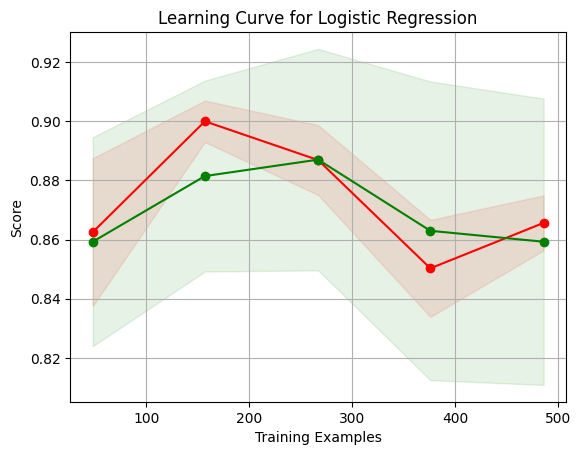

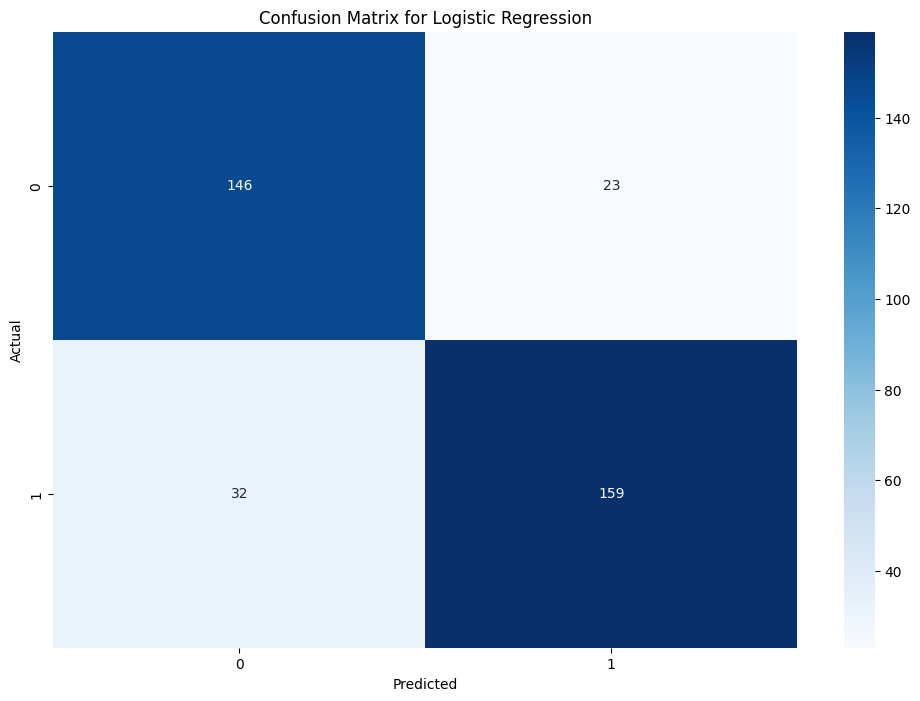

Decision Tree accuracy: 78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       169
           1       0.83      0.74      0.78       191

    accuracy                           0.78       360
   macro avg       0.79      0.79      0.78       360
weighted avg       0.79      0.78      0.78       360

Confusion Matrix:
 [[141  28]
 [ 50 141]]


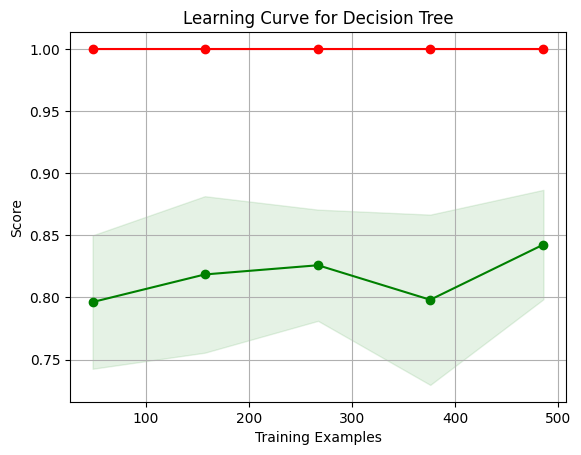

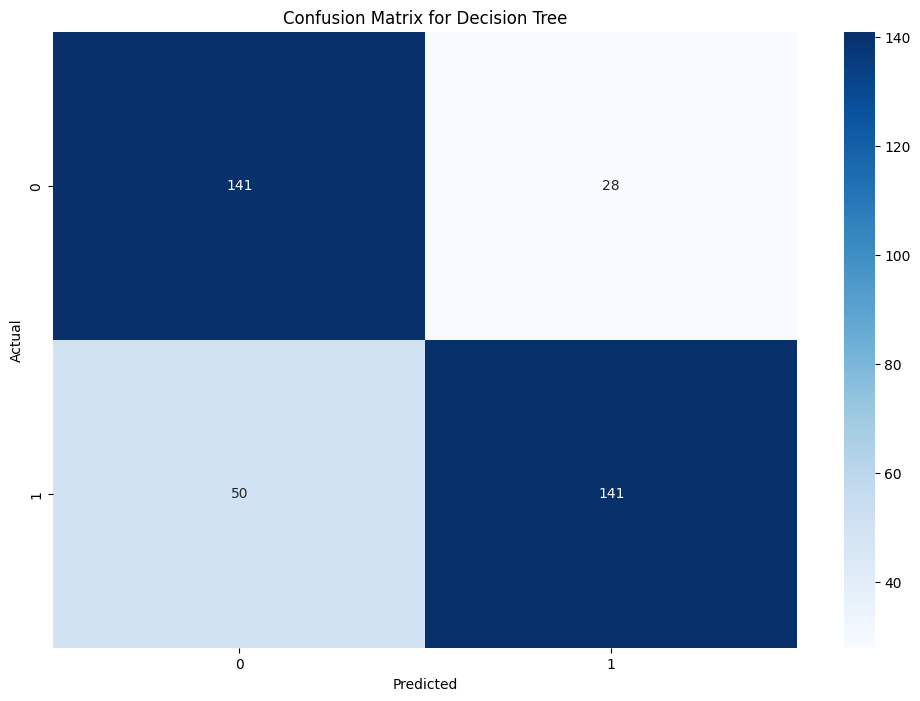

KNN accuracy: 83.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       169
           1       0.84      0.86      0.85       191

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

Confusion Matrix:
 [[138  31]
 [ 27 164]]


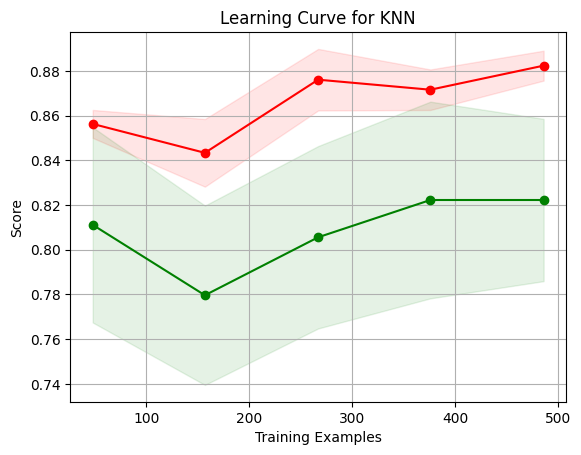

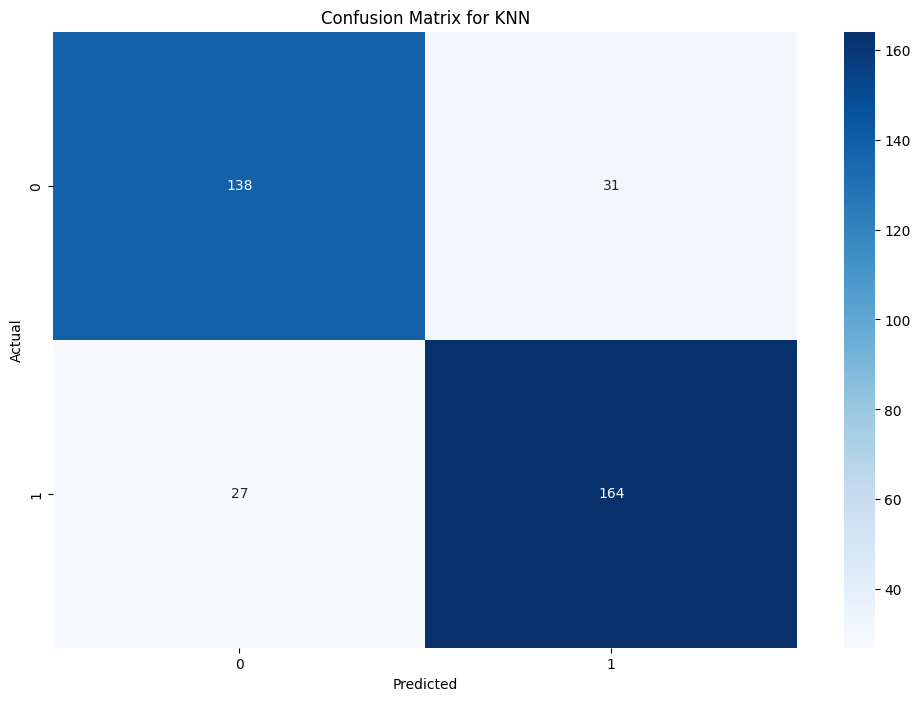

Naive Baiyes accuracy: 83.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       169
           1       0.82      0.88      0.85       191

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

Confusion Matrix:
 [[133  36]
 [ 22 169]]


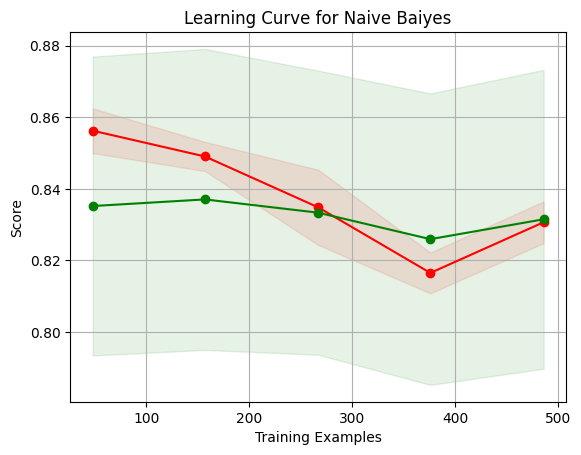

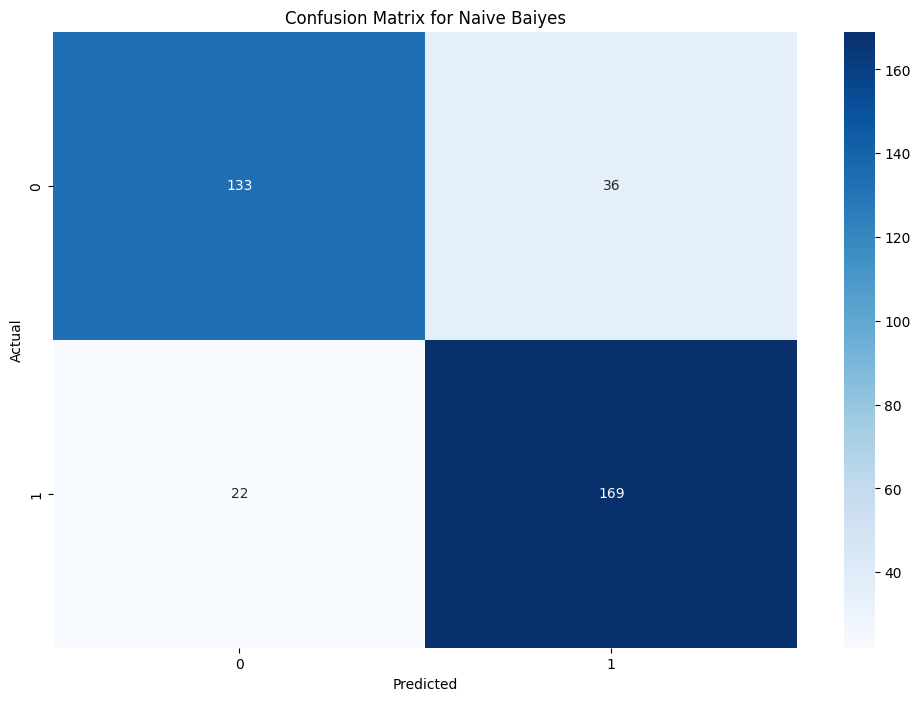

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} accuracy: {accuracy * 100:.2f}%")

    # Classification Report and Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    print("Confusion Matrix:\n", conf_matrix)

# Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation for train and test scores
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    # Plot learning curve
    plt.figure()
    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    # Plot the learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

  #  Mean Squared Error and Root Mean Squared Error
  # mse = mean_squared_error(Y_test, Y_pred)
  # rmse = np.sqrt(mse)
  # print(f"{name} Mean Squared Error (MSE): {mse:.2f}")
  # print(f"{name} Root Mean Squared Error (RMSE): {rmse:.2f}")

  # Mean Absolute Error
  # mae = mean_absolute_error(Y_test, Y_pred)
  # rmse = np.sqrt(mse)
  # print(f"{name} Mean Squared Error (MSE): {mse:.2f}")

  # Mean Absolute Error
  # mae = mean_absolute_error(Y_test, Y_pred)
  # print(f"{name} Mean Absolute Error (MAE): {mae:.2f}")


#### Results and Analysis
# Result :
so from the data, so we can conclude logistic Regression = 84,72% is the highest accuracy

# Analysis :

Based on the learning curve, KNN is the most better one because as we can see in this problem KNN have the biggest accuracy value compare with the decision tree

#### Conclusion
In conclusion we better use Logistic regression for our dataset problems  instead of the other method since Logistic regression have the highest accuracy but for a comparison, the other three method also performs well since the difference of the accuracy is not really noticeable.